##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



In [4]:
# The purpose of my project is to gain insight of voter registration trends in the U.S. on both a national and state scale.
# The goal is identify how trends on a small, local scale compare to trends on a national scale.
# Specifically, do trends on a local scale reflect the ideas in trends on a national scale.
# It is important for someone to read this notebook because it provides information on how their local and national community is doing in terms of
# advocating for themselves in government. It highlights the importance of voting when every vote does indeed matter, and reflects the
# needs and desires of the community to ultimately place a person in government that represents said needs.

# Question 1: What is the effect of the U.S. region (West, Midwest, Northeast, and South) on voter registration?
# Question 2: Is voter registration higher in the District of Columbia compared to other U.S. states? D.C. has the White House which may influence increased
# engagement in politics from residents and voters in the area.

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [5]:
voters.head(5)

# "Jurisdiction" is an object, and represents the name of the U.S. state.
# "Year" is an integer, and represents the year of when people registered to vote.
# "Month" is an object, and represents the month of when people registered to vote.
# "New registered voters" is an integer, and represents how many people registered to vote.

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Check for any missing data. (1 point)

In [6]:
voters.isna().values.any()

False

Check your data types. (1 point)

In [7]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [8]:
voters = voters.rename(columns={"Jurisdiction":"NAME", "New registered voters": "registered_voters"})

Explain any potential limitations to your data (2 points)

In [9]:
# I want to assess all five regions of the U.S. (West, Midwest, Northeast, and South).
# The limitation to my data is thus, the dataset only has 11 states but some regions have more data than other regions.
# So I cannot generate a full picture to answer my research questions when there is not equal data for all four regions.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)





In [10]:
voters.loc[voters.registered_voters == voters.registered_voters.max()]

# The highest amount of new voter registration is 238281 voters in California in Feb 2020.

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

In [11]:
voters["registered_voters"].mean()

# The average voter registration is 48223.46226415094 voters which can be rounded down to 48223 voters.

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [12]:
high_voters = voters[voters["registered_voters"] > voters["registered_voters"].mean()]
len(high_voters)

# The times where voter registration was higher than the average 48223.46 voters is 36 times.

36

How many times did each state go above the national average for new voter registration? (2 points)



In [13]:
state_count = high_voters.groupby('NAME')['registered_voters'].count()
state_count

# Arizona went above the national average for new voter registration 3 times.
# California went above the national average for new voter registration 7 times.
# Florida went above the national average for new voter registration 7 times.
# Georgia went above the national average for new voter registration 1 times.
# Illinois went above the national average for new voter registration 4 times.
# North Carolina went above the national average for new voter registration 6 times.
# Texas went above the national average for new voter registration 8 times.

,registered_voters
NAME,
Arizona,3
California,7
Florida,7
Georgia,1
Illinois,4
North Carolina,6
Texas,8


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [14]:
# find each state's average voter registration
avg_voters_by_state = voters.groupby('NAME')['registered_voters'].mean()

# sort  states by avg voter registration in descending order to get top three
top_three_states = avg_voters_by_state.sort_values(ascending=False).head(3)

top_three_states

# California, Texas, and Florida had the highest average voter registration overall.

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

<ipython-input-15-75b2834126df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NAME', y='registered_voters', data=voter_registration_by_state, palette="magma")


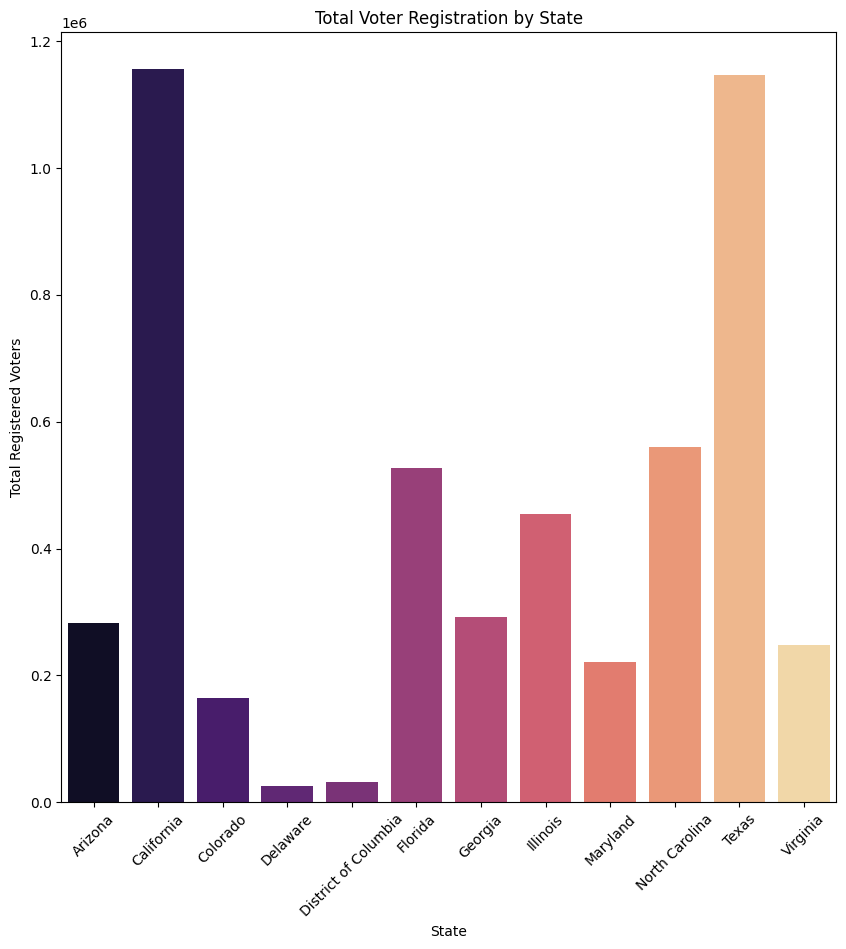

In [15]:
# find total registered voters per state
voter_registration_by_state = voters.groupby('NAME')['registered_voters'].sum().reset_index()

# create plot
plt.figure(figsize=(10, 10))
sns.barplot(x='NAME', y='registered_voters', data=voter_registration_by_state, palette="magma")
plt.xlabel("State")
plt.ylabel("Total Registered Voters")
plt.title("Total Voter Registration by State")
plt.xticks(rotation=45)
plt.show()

# From the bar plot, we can observe variations in voter registration across different states.
# Some states like California and Texas show significantly higher total voter registrations compared to others.
# This could be due to various factors like population density, demographics, and political engagement within each state.

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

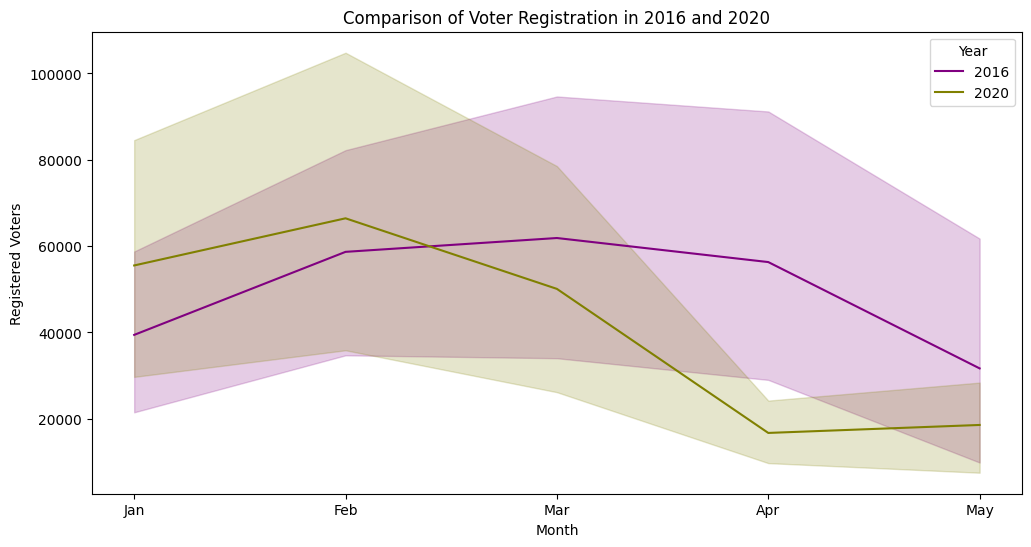

In [16]:
# filter data for 2016 and 2020
voters_2016_2020 = voters[(voters["Year"] == 2016) | (voters["Year"] == 2020)]

# create plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="registered_voters", hue="Year", data=voters_2016_2020, palette=["purple", "olive"])
plt.xlabel("Month")
plt.ylabel("Registered Voters")
plt.title("Comparison of Voter Registration in 2016 and 2020")
plt.show()

# The plot shows a comparison of voter registration trends between 2016 and 2020, broken down by month.
# Visual inspection suggests that voter registration in 2020 was higher than in 2016 in the months January and February.
# However it is from March to May where voter registration in 2016 significantly surpassed that in 2020.
# The biggest decline in voter registration for 2020 was in the month April.

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

<ipython-input-17-a16220a92d26>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='registered_voters', data=region_voter_counts, palette="magma")


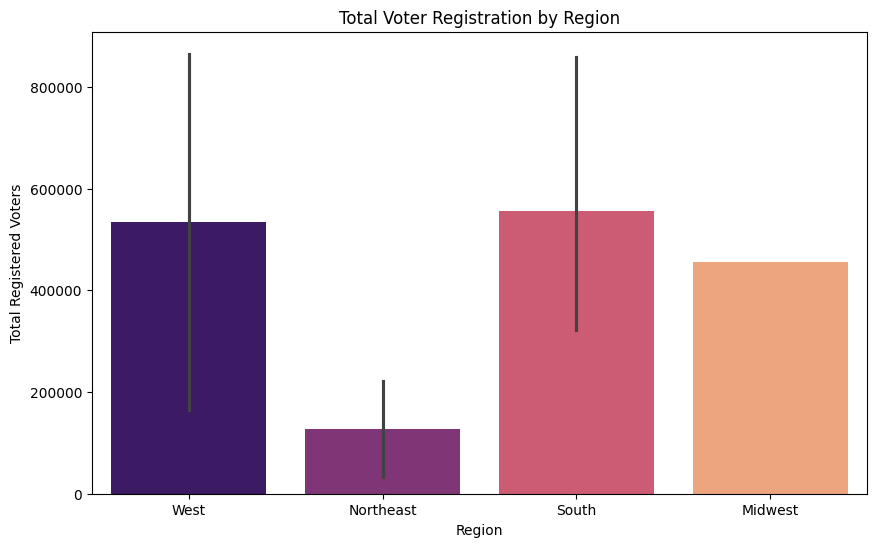

In [17]:
# plot relating to national level research question
# national level research question: What is the effect of the U.S. region (West, Midwest, Northeast, and South) on voter registration?

# group data by region and find the total registered voters for each region
region_voter_counts = voters.groupby('NAME')['registered_voters'].sum().reset_index()

# create dictionary to map states to regions
state_regions = {
    'Arizona': 'West',
    'California': 'West',
    'Colorado': 'West',
    'Deleware': 'Northeast',
    'District of Columbia': 'Northeast',
    'Florida': 'South',
    'Georgia': 'South',
    'Illinois': 'Midwest',
    'Maryland': 'Northeast',
    'North Carolina': 'South',
    'Texas': 'South',
    'Virginia': 'South'
}

# add 'Region' column to dataframe
region_voter_counts['Region'] = region_voter_counts['NAME'].map(state_regions)

# plot by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='registered_voters', data=region_voter_counts, palette="magma")
plt.xlabel("Region")
plt.ylabel("Total Registered Voters")
plt.title("Total Voter Registration by Region")
plt.show()

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [18]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 12.11 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [19]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

Set our continental US bounding box to us for the next questions. (2 points)

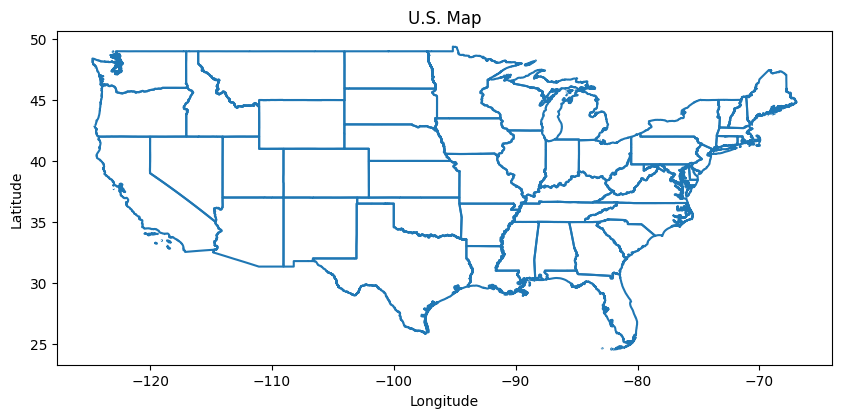

In [20]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

bbox.boundary.plot(figsize=(10, 10))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("U.S. Map")
plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [21]:
average_voters_per_state = voters.groupby('NAME')['registered_voters'].mean().reset_index()
average_voters_per_state

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [22]:
merge = pd.merge(bbox, average_voters_per_state, on='NAME', how='inner')
merge

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

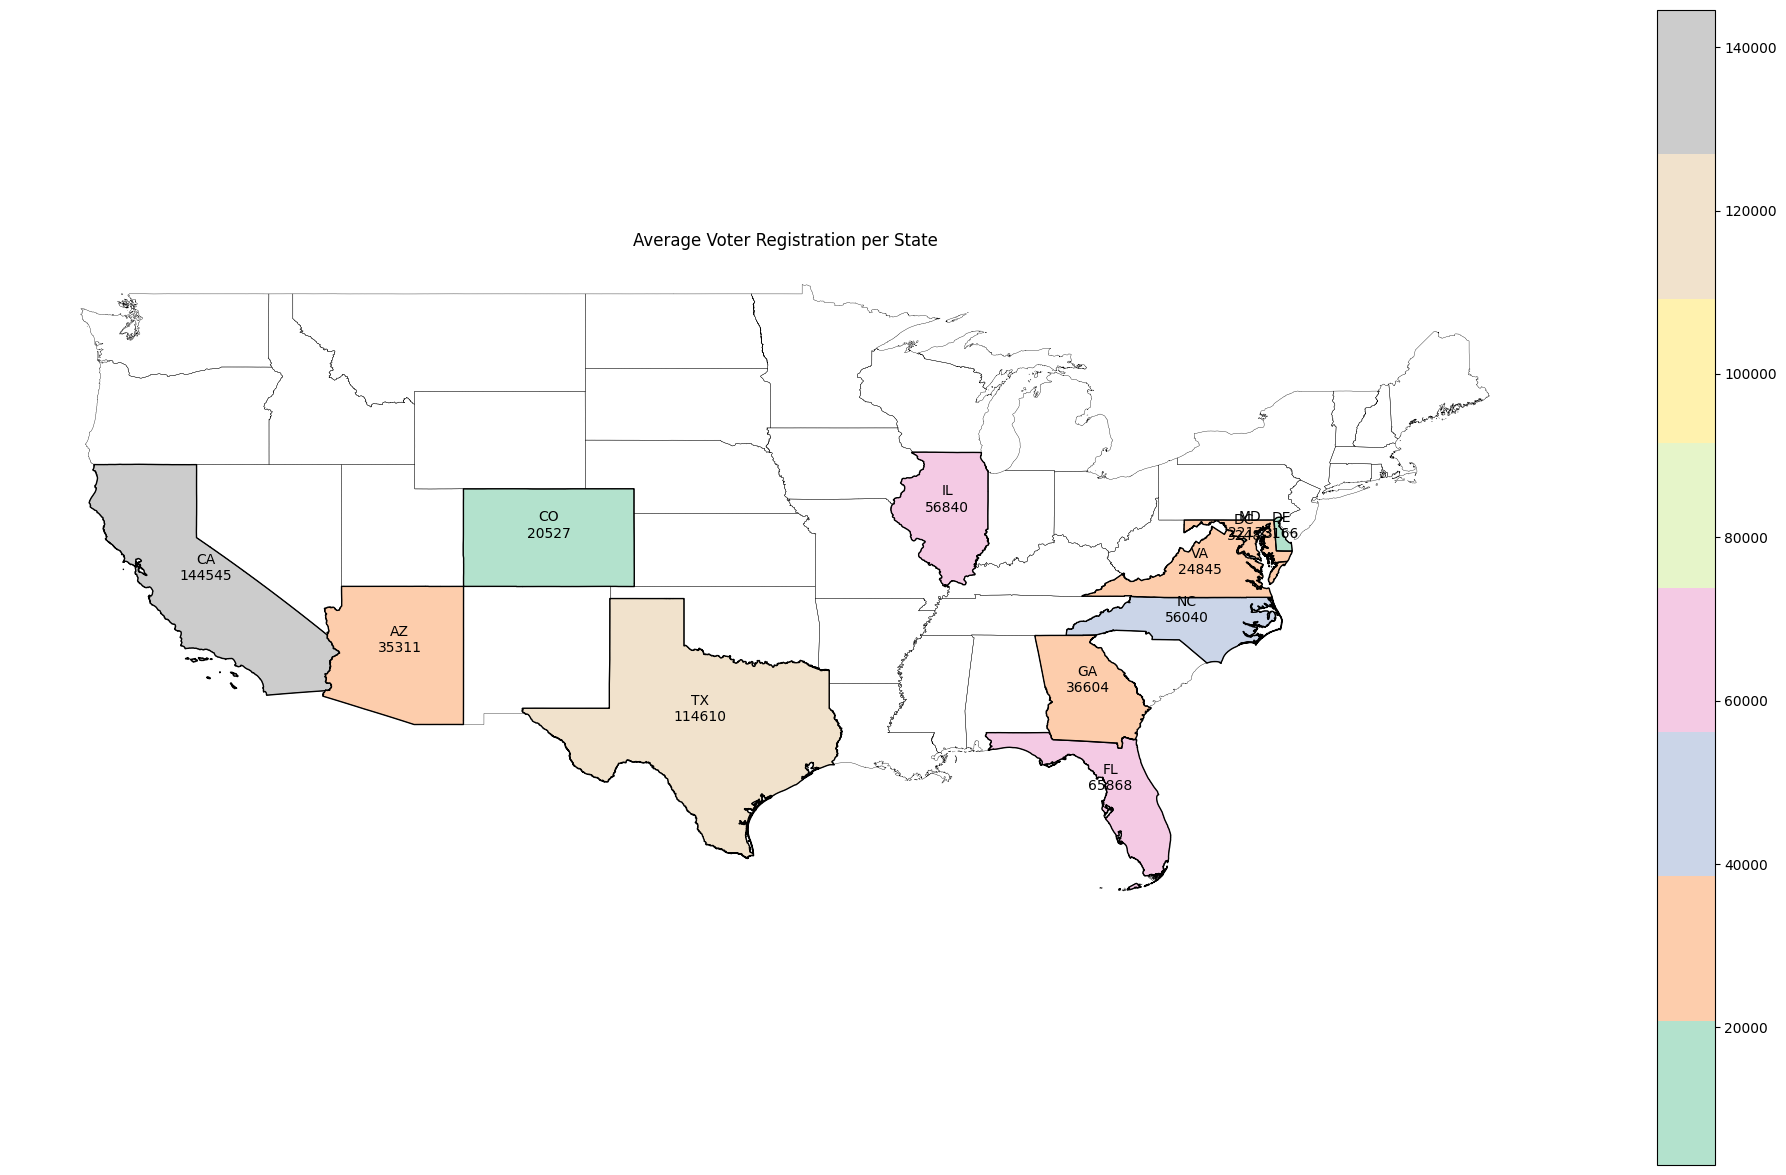

In [26]:
fig = plt.figure(1,figsize=(25,15))
ax = fig.add_subplot()

us_map = bbox.boundary.plot(ax=ax, figsize = (25, 15), edgecolor = "black", linewidth = .25)

states_in_data = merge[merge["STUSPS"].isin(["NC", "VA", "FL", "TX", "CA", "GA", "CO", "IL", "AZ", "DC", "MD", "DE"])]
states_in_data.plot(ax=ax, edgecolor="black", column='registered_voters', legend=True, cmap="Pastel2")

states_in_data.apply(lambda x: ax.annotate(text=x.STUSPS + "\n" + str(int(float(x.registered_voters))),
    xy=(x.geometry.centroid.x, x.geometry.centroid.y), ha="center", fontsize=10), axis=1)

us_map.axis("off")
plt.title("Average Voter Registration per State")
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


In conclusion, this notebook provides insights, suggestions, and possible next steps.

For insights, we see that the three states with the highest average voter registration are California, Texas, and Florida. It makes sense that California is the highest given that it has the greatest population compared to the other two states. We also see that voter registration significantly declined in 2020 compared to 2016, due to a global pandemic and national lockdown. Lastly, we see that the Northeast region had the lowest voter registration whereas the South region had the greatest voter registration.

For suggestions, more government or community efforts could be made to increase voter registration in the Northeast region. Specifically, we can identify why states like Texas, California, and Florida frequently go above the national average for new voter registration and implement those strategies in other states that have low voter registration. We can also increase advertising efforts for absentee ballots to address lows in voter registration at times when residents are not able to leave the house due to a pandemic for instance, or for other reasons.

For possible next steps, one next step to take if continuing to work with this project is to get voter registration data for all 50 states in the U.S. Then, we can answer my national level research question and truly identify the number of registered voters in each state and then in the region. This will enable us to see which regions in the U.S. have the highest voter registration, identify their root causes in such high numbers of voters, and then apply these changes to other states and regions to improve their voter registration numbers.



##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

In [27]:
https://github.com/cindyliiu/325-Midterm

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
Cindy Liu